In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO

In [34]:
excel_url = "https://docs.google.com/spreadsheets/d/1JaJagi-9hRp8PONku72K3bcCtfk3OY4iRlpUbTQPjvc/export?format=xlsx&id=1JaJagi-9hRp8PONku72K3bcCtfk3OY4iRlpUbTQPjvc"

response = requests.get(excel_url)
df = pd.read_excel(BytesIO(response.content), engine='openpyxl')
pd.set_option('display.width', 1000)
print(df.head(10))

      id        make           model  year           VClass              drive              trans          fuelType  cylinders  displ  pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  ghgScore
0  32204      Nissan            GT-R  2013  Subcompact Cars    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4         4
1  32205  Volkswagen              CC  2013     Compact Cars  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   94    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6         6
2  32206  Volkswagen              CC  2013     Compact Cars  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   94    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5         5
3  32207  Volkswagen      CC 4motion  2013     Compact Cars    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   94    0 

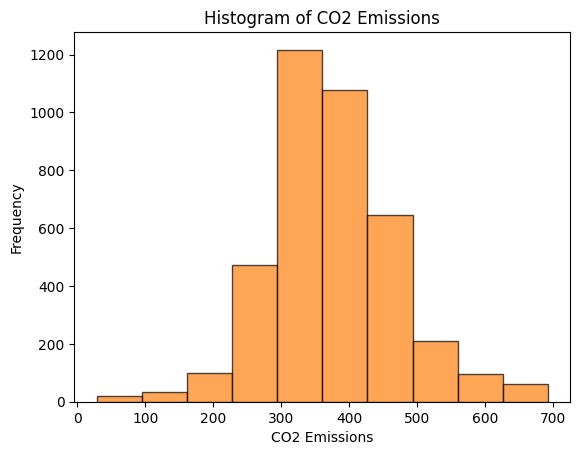

In [23]:
plt.hist(df['co2'], edgecolor='black', color='#ff7f0e', bins=10, alpha=0.7)
plt.title('Histogram of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

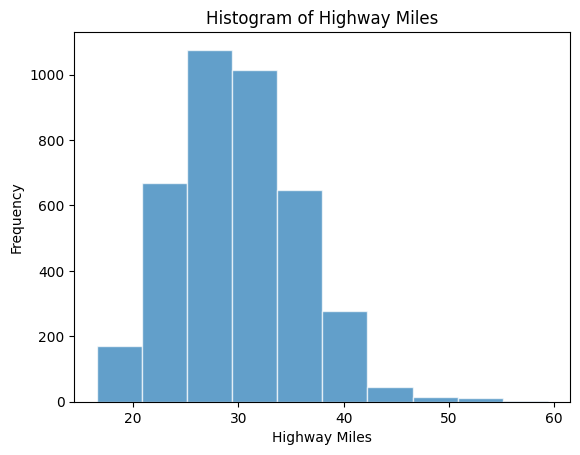

In [25]:
plt.hist(df['highway'], edgecolor='white', color='#1f77b4', bins=10, alpha=0.7)
plt.title('Histogram of Highway Miles')
plt.xlabel('Highway Miles')
plt.ylabel('Frequency')
plt.show()

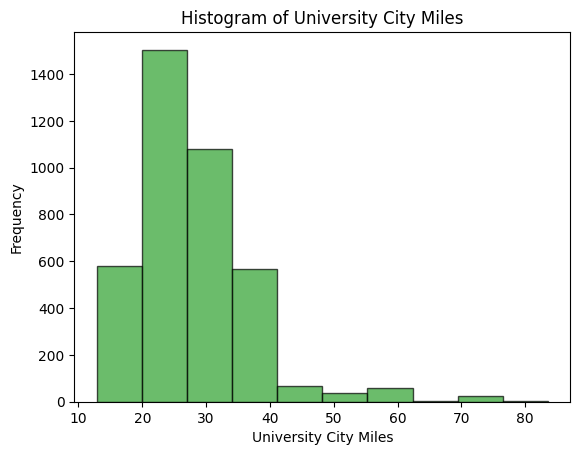

In [26]:
plt.hist(df['UCity'],edgecolor='black', color='#2ca02c', bins=10,alpha=0.7)
plt.title('Histogram of University City Miles')
plt.xlabel('University City Miles')
plt.ylabel('Frequency')
plt.show()

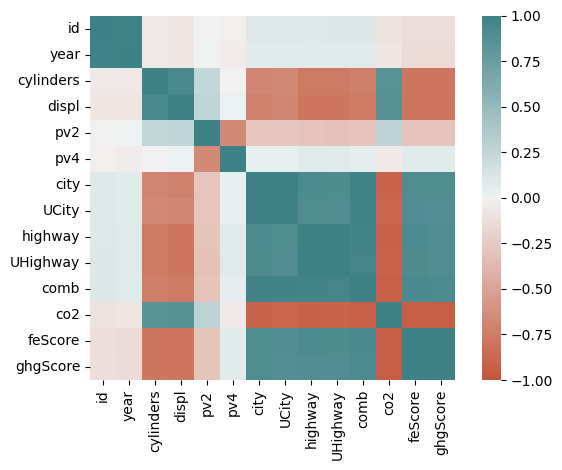

In [30]:
numerical_cols = ['id', 'year', 'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity',
                  'highway', 'UHighway', 'comb', 'co2', 'feScore', 'ghgScore']
df_numeric = df[numerical_cols]

corr_matrix = df_numeric.corr()

cmap = sns.diverging_palette(20, 200, as_cmap=True)

sns.heatmap(corr_matrix,
            cmap=cmap,
            vmax=1.0,
            vmin=-1.0,
            center=0,
            square=True,
)

plt.tight_layout()
plt.show()

**From the heatmap:**

*   co2 vs ghgScore: very dark blue (correlation close to -1)
*   displ, cylinders, city, highway, comb all have negative correlation with ghgScore



*   feScore has a very strong positive correlation with ghgScore (close to 1)
*   id and year have weak correlation with ghgScore


**Heatmap Tells**

*   Vehicles with high CO₂ emissions or large engines (displ, cylinders) tend to have lower ghgScore.
*   Higher fuel efficiency (feScore) strongly contributes to a better greenhouse gas score.

*   Several features are redundant (e.g., city, UCity, highway, UHighway, comb all measuring mileage).







**Columns To Drop**

*   id: Just unique Identifier. it adds no value in analysis
*   feScore and co2: They are tightly tied to ghgScore, considering them may leak target information

*   UCity,UHighway and comb: They are redudant since city and highway achieves the same purpose





